In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf_results = pd.read_csv('tf_fool_res.csv')

In [3]:
tf_results.head()

,trial_id,robust_acc,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,456f6ed4,0.885585,0.471542,True,NaN,NaN,2,347b3f6d4098470daa3bbdfa8831ec17,2020-10-06_13-36-06,1602016566,...,lambda1,140.221.79.11,116.879289,0,2,"1_batch_size=476,dropout=0.68021,epochs=74,lea...",0.044517,0.680206,74,476
1,456f6ed5,0.485588,1.703615,True,NaN,NaN,2,06018052def64d6b8052425e95374f6f,2020-10-06_13-35-52,1602016552,...,lambda1,140.221.79.11,102.839213,0,2,"2_batch_size=435,dropout=0.89571,epochs=55,lea...",0.050067,0.895706,55,435
2,456f6ed6,0.902360,6.123099,True,NaN,NaN,2,8fcdf48f35ba49bbaa4e08d6ca4c6137,2020-10-06_13-35-24,1602016524,...,lambda1,140.221.79.11,74.953371,0,2,"3_batch_size=906,dropout=0.67338,epochs=49,lea...",0.043194,0.673383,49,906
3,456f6ed7,0.896333,2.069999,True,NaN,NaN,2,3415afb9e41e446483b46a210b743981,2020-10-06_13-35-51,1602016551,...,lambda1,140.221.79.11,102.119095,0,2,"4_batch_size=860,dropout=0.46823,epochs=70,lea...",0.086927,0.468228,70,860
4,456f6ed8,0.850485,2.026856,True,NaN,NaN,2,605ba38afdc34d8fab0e1fd7e399a37a,2020-10-06_13-35-59,1602016559,...,lambda1,140.221.79.11,109.738630,0,2,"5_batch_size=444,dropout=0.64795,epochs=69,lea...",0.054323,0.647953,69,444


In [4]:
pt_results = pd.read_csv('pt_fool_res.csv')

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [6]:
tf_results['pca'] = pca.fit_transform(tf_results[['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']])

In [7]:
pca = PCA(n_components=1)

In [8]:
pt_results['pca'] = pca.fit_transform(pt_results[['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']])

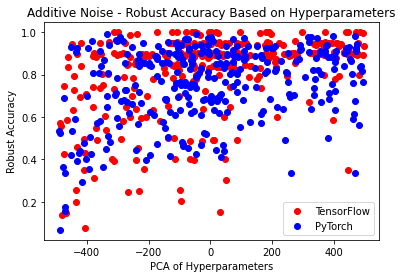

In [9]:
ax = plt.gca()
ax.scatter(tf_results['pca'], tf_results['robust_acc'], color="red", label="TensorFlow")
ax.scatter(pt_results['pca'], pt_results['robust_acc'], color="blue", label="PyTorch")
ax.set_title("Additive Noise - Robust Accuracy Based on Hyperparameters")
ax.set_xlabel("PCA of Hyperparameters")
ax.set_ylabel("Robust Accuracy")
ax.legend()
plt.show()